In [1]:
import pandas as pd
import math
import numpy as np
from matplotlib import pyplot as plt
from numpy import mean
import statsmodels.api as sm

In [19]:
df = pd.read_csv('C:/Users/no1ca/OneDrive/Documents/Masters/Final Masters Model/Iteration_1/it1_data_preprocessed.csv', index_col=[0])

In [20]:
df.head()

,Starting_Mass,Parity,Multiple_Fetuses,HT_History,Previous_Miscarriage,Previous_Stillbirth,Diabetic,Diabetes_Fhistory,Age,HT_Fhistory,...,Developed_PE,Starting_Week,Starting_SBP,Starting_DBP,SBP_1,DBP_1,SBP_2,DBP_2,SBP_3,DBP_3
0,50.900000,0,False,False,False,False,False,False,21,False,...,False,16,120,70,110,70,120,70,110,70
1,79.600000,0,False,False,False,False,False,False,30,False,...,False,8,134,81,127,76,130,80,112,71
2,71.904062,0,False,False,False,False,False,False,28,False,...,True,9,127,82,116,78,114,77,112,67
3,70.000000,2,False,False,True,False,False,False,26,False,...,False,13,129,75,110,70,124,69,135,68
5,76.600000,0,False,False,False,False,False,False,32,False,...,False,9,125,85,129,82,117,78,118,74


In [5]:
# make a list of the variables that contain missing values
vars_with_na = ['Starting_Mass','Mass_1','Mass_2','Mass_3','Starting_SBP','SBP_1','Starting_DBP','DBP_1','Starting_Week', 'Week_1', 'Week_2', 'Week_3']

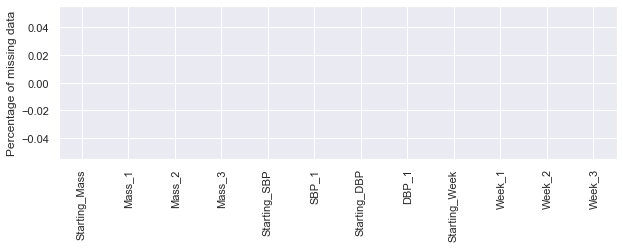

In [196]:
# plot

(df[vars_with_na] == 0).mean().sort_values(
    ascending=False).plot.bar(figsize=(10, 4))
plt.ylabel('Percentage of missing data')
plt.subplots_adjust(bottom=0.35)
plt.savefig('it1_mis_perc.png')

plt.show()

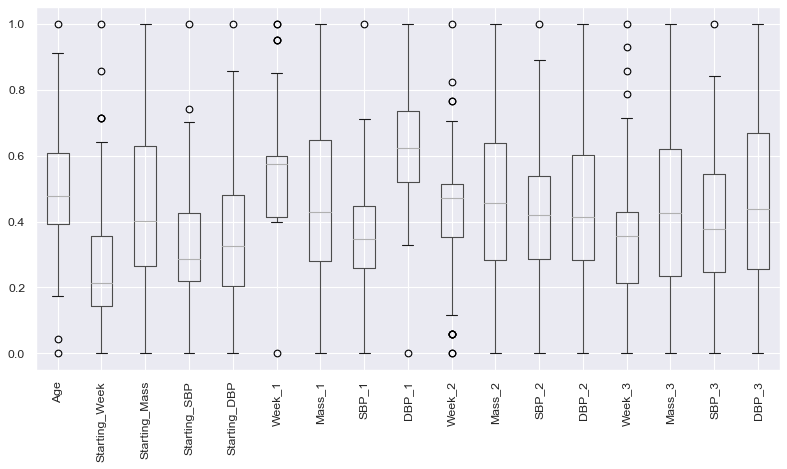

In [197]:
from sklearn.preprocessing import MinMaxScaler

# log plots

cat_vars = ['Multiple_Fetuses', 'HT_History', 'Previous_Miscarriage','Previous_Stillbirth','Diabetic','Diabetes_Fhistory','HT_Fhistory','Parity','Developed_PE']
num_vars = df.drop(cat_vars, axis=1)

data = df.drop(cat_vars, axis=1)

scaler = MinMaxScaler()

scaler.fit(data)

data = pd.DataFrame(
        scaler.transform(data),
        columns=data.columns
    )

def plot_box(df):

    fig, ax = plt.subplots(figsize=(12, 6), dpi=80)
    
    bp = df.boxplot()

    plt.xticks(rotation=90)

    plt.show()

plot_box(data)

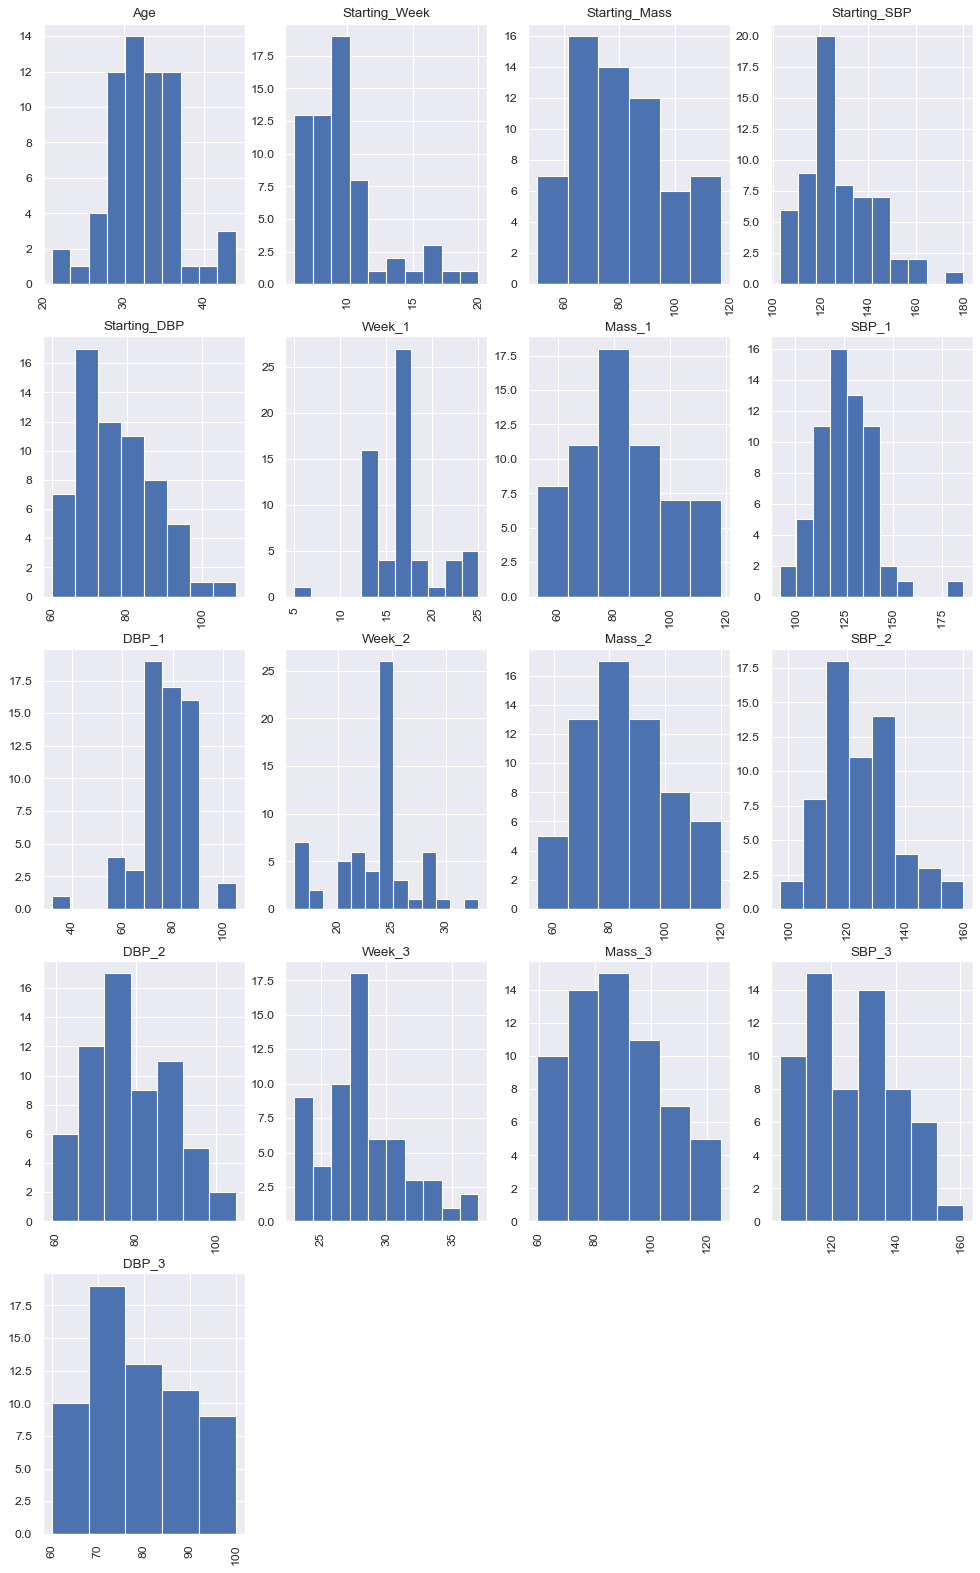

In [198]:
from sklearn.preprocessing import MinMaxScaler

# log plots

cat_vars = ['Multiple_Fetuses', 'HT_History', 'Previous_Miscarriage','Previous_Stillbirth','Diabetic','Diabetes_Fhistory','HT_Fhistory','Parity','Developed_PE']
num_vars = df.drop(cat_vars, axis=1)

data = df.drop(cat_vars, axis=1)

fig = plt.figure(figsize=(15, 25), dpi=80)
    
def plot_box(df, var, i , j):

    q1 = df[var].quantile(0.25)
    q3 = df[var].quantile(0.75)
    iqr = q3 - q1
    bin_width = (2 * iqr) / (len(df[var]) ** (1 / 3))
    bin_count = int(np.ceil((df[var].max() - df[var].min()) / bin_width))
    
    ax = fig.add_subplot(5,4,i)
    ax.set_title(var)
    df[var].hist(bins=bin_count, ax=ax)

    plt.xticks(rotation=90)

i = 1
j = 0

for var in num_vars:
    plot_box(data, var, i , j)
    i += 1
    j += 1

plt.show()

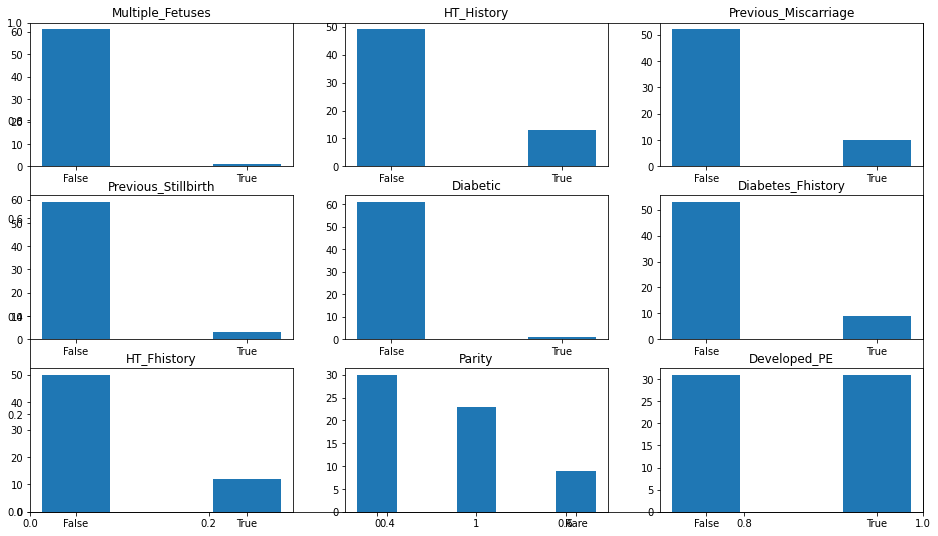

In [29]:
from sklearn.preprocessing import MinMaxScaler

# log plots

cat_vars = ['Multiple_Fetuses', 'HT_History', 'Previous_Miscarriage','Previous_Stillbirth','Diabetic','Diabetes_Fhistory','HT_Fhistory','Parity','Developed_PE']
num_vars = df.drop(cat_vars, axis=1)

data = df#.drop('Developed_PE', axis=1)
#y = df['Developed_PE']

fig, ax = plt.subplots(figsize =(16, 9))
    
def plot_box(df, var):

    ax = fig.add_subplot(3,3,i)
    ax.set_title(var)

    if var == 'Parity':
        plt.bar(['0', '1', 'Rare'], df[var].value_counts(), width = 0.4)
    else:
        plt.bar(['False', 'True'], df[var].value_counts(), width = 0.4)

i = 1
for var in cat_vars:
    plot_box(data[cat_vars], var)
    i += 1

plt.show()

<AxesSubplot:>

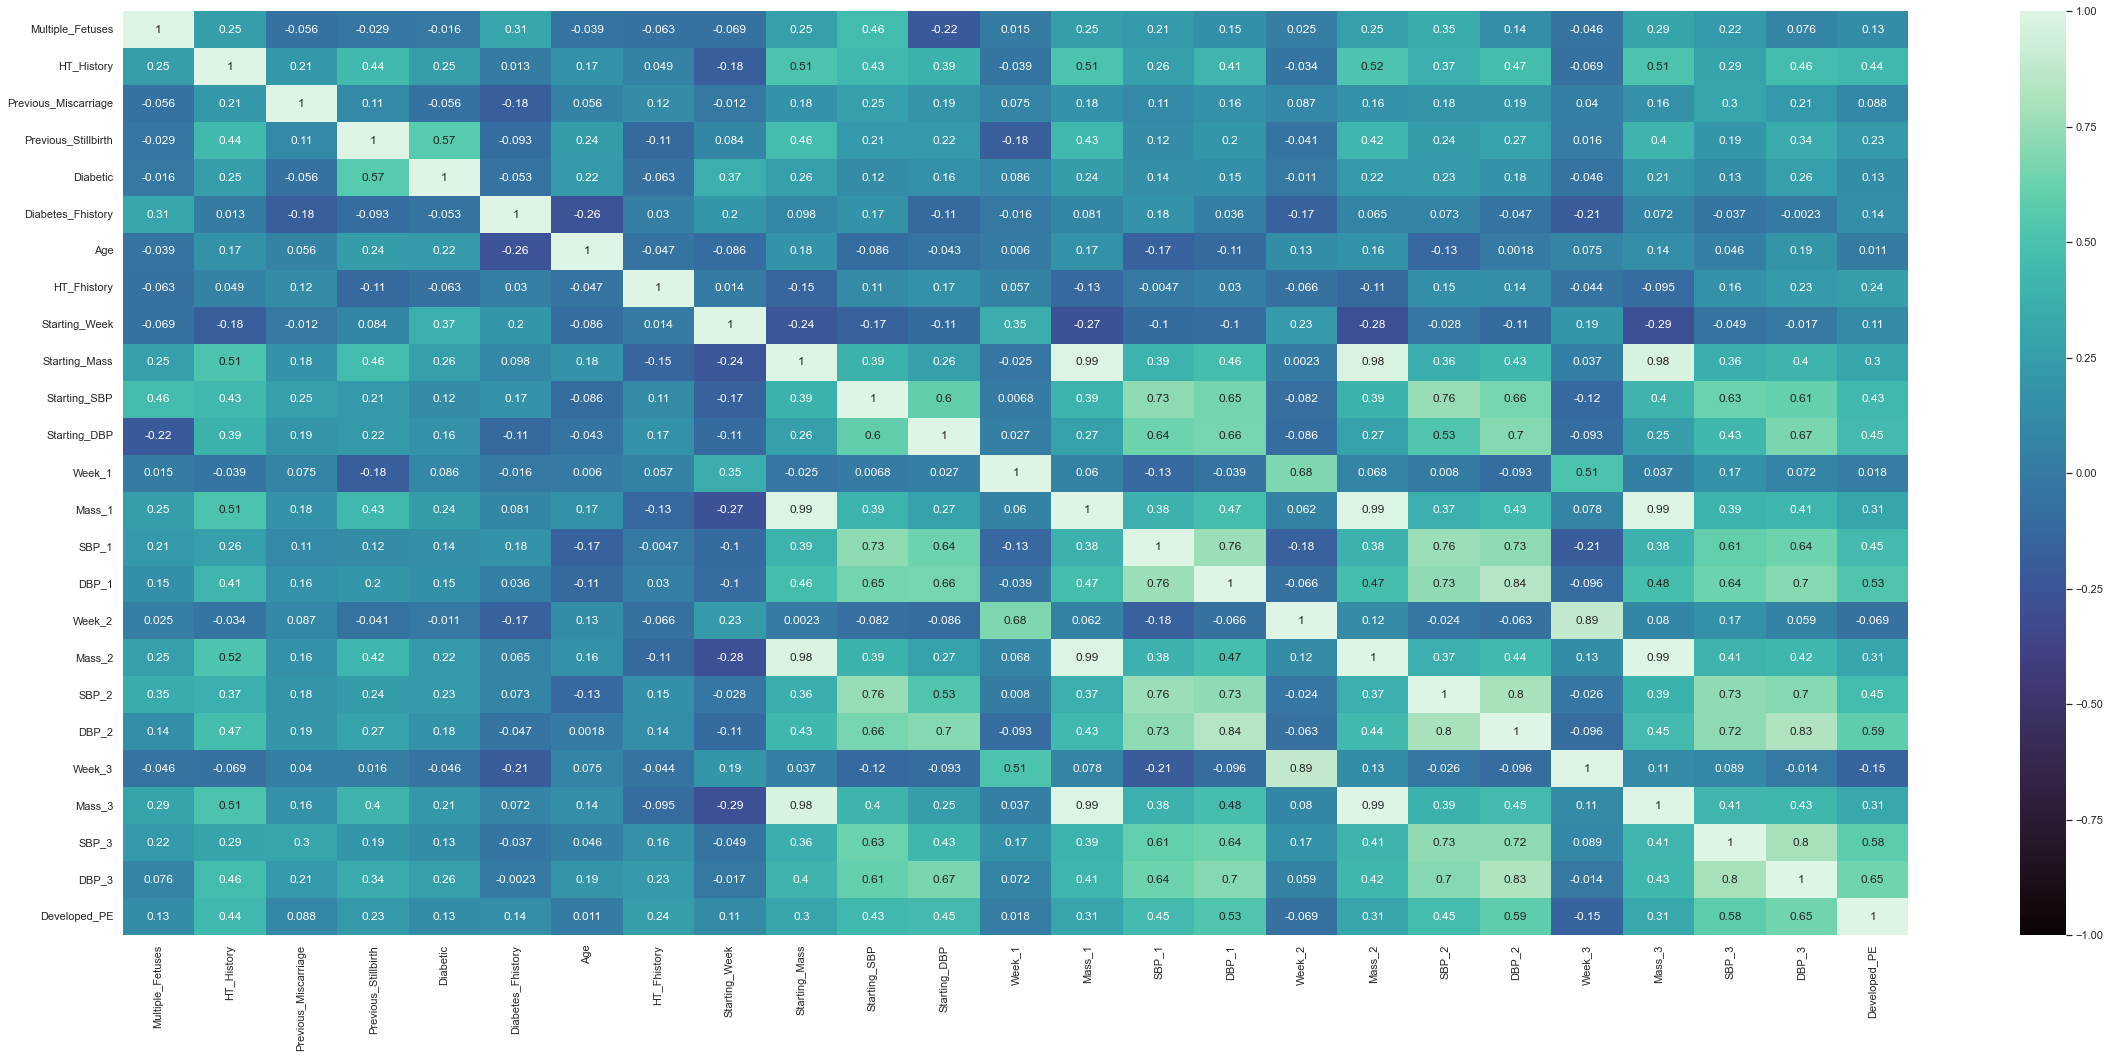

In [247]:
data = df.copy()

import seaborn as sns
corr = data.corr()
fig, ax = plt.subplots(figsize=(40,17)) 
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            vmin=-1, 
            vmax=1,
            annot=True,
            ax=ax,
            cmap='mako')

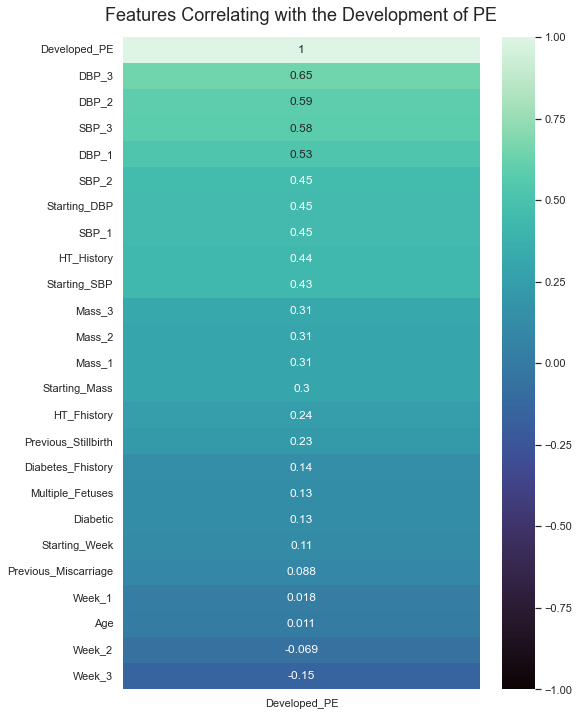

In [246]:
data = df.copy()

plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['Developed_PE']].sort_values(by='Developed_PE', ascending=False), vmin=-1, vmax=1, annot=True, cmap='mako')
heatmap.set_title('Features Correlating with the Development of PE', fontdict={'fontsize':18}, pad=16);

In [16]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

data = df.copy()

X = data.drop(cat_vars, axis=1)
y = data['Developed_PE']

fvalue_Best = SelectKBest(f_classif, k=10)
X_kbest = fvalue_Best.fit_transform(X, y)
print(X_kbest)

print('Original number of features:', X.shape)
print('Reduced number of features:', X_kbest.shape)

[[120.          70.         110.          70.          58.
  120.          70.          62.         110.          70.        ]
 [134.          81.         127.          76.          85.
  130.          80.          87.3        112.          71.        ]
 [127.          82.         116.          78.          80.
  114.          77.          80.         112.          67.        ]
 [129.          75.         110.          70.          78.8
  124.          69.          78.8        135.          68.        ]
 [125.          85.         129.          82.          80.
  117.          78.          83.         118.          74.        ]
 [124.          61.         124.          61.          66.5
  115.          65.          67.9        122.          63.        ]
 [110.          64.         120.          70.          96.
  109.          68.         100.         115.          60.        ]
 [125.          79.         128.          83.          80.8
  123.          84.          84.4        129.    

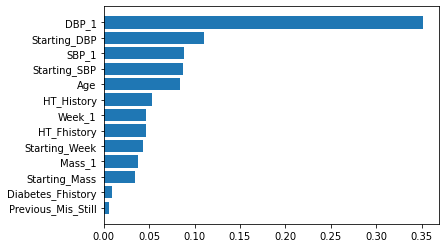

array(['HT_History', 'Previous_Mis_Still', 'Diabetes_Fhistory', 'Age',
       'HT_Fhistory', 'Starting_Week', 'Starting_Mass', 'Starting_SBP',
       'Starting_DBP', 'Week_1', 'Mass_1', 'SBP_1', 'DBP_1'], dtype=object)

In [3]:
import numpy as np
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt

data = df.copy()

X = data.drop(['Developed_PE'], axis=1)

y = data['Developed_PE']

features = X.columns

rf = RandomForestRegressor(random_state=0)
rf.fit(X,y)

f_i = list(zip(features,rf.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])

plt.show()

rfe = RFECV(rf,cv=5,scoring="neg_mean_squared_error")
rfe.fit(X,y)

selected_features = np.array(features)[rfe.get_support()]
selected_features

In [4]:
X.columns

Index(['HT_History', 'Previous_Mis_Still', 'Diabetes_Fhistory', 'Age',
       'HT_Fhistory', 'Starting_Week', 'Starting_Mass', 'Starting_SBP',
       'Starting_DBP', 'Week_1', 'Mass_1', 'SBP_1', 'DBP_1'],
      dtype='object')

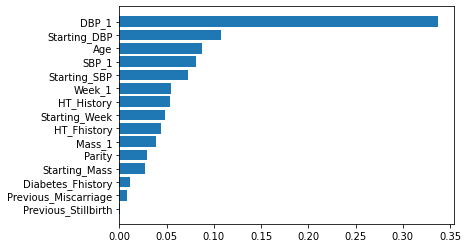

array(['Parity', 'HT_History', 'Previous_Miscarriage',
       'Previous_Stillbirth', 'Diabetes_Fhistory', 'Age', 'HT_Fhistory',
       'Starting_Week', 'Starting_Mass', 'Starting_SBP', 'Starting_DBP',
       'Week_1', 'Mass_1', 'SBP_1', 'DBP_1'], dtype=object)

In [22]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt

data = df.copy()
data = data[['Parity','HT_History', 'Previous_Miscarriage', 'Previous_Stillbirth',
       'Diabetes_Fhistory', 'Age', 'HT_Fhistory', 'Starting_Week',
       'Starting_Mass', 'Starting_SBP', 'Starting_DBP', 'Week_1',
       'Mass_1', 'SBP_1', 'DBP_1', 'Developed_PE']]

X = data.drop(['Developed_PE'], axis=1)
y = data['Developed_PE']

features = X.columns

rf = RandomForestRegressor(random_state=0)
rf.fit(X,y)

f_i = list(zip(features,rf.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])

plt.show()

rfe = RFECV(rf,cv=5,scoring="neg_mean_squared_error")
rfe.fit(X,y)

selected_features = np.array(features)[rfe.get_support()]
selected_features